In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
data=pd.read_csv('job_market.csv')
data

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.16520,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.56247,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.26310,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.95376,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.92217,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.39400,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.99210,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.93310,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.15063,Yes,Stable


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


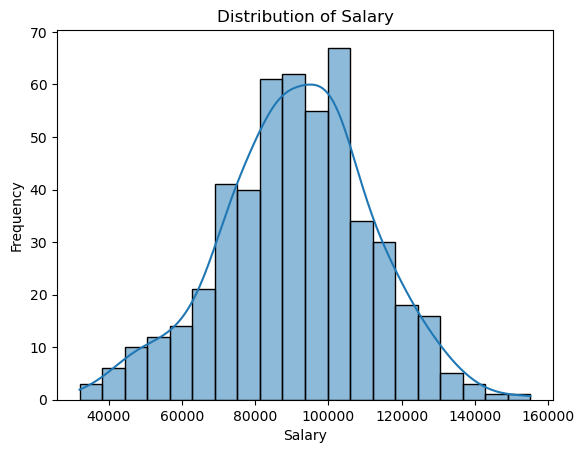

In [9]:
sns.histplot(data['Salary_USD'],kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

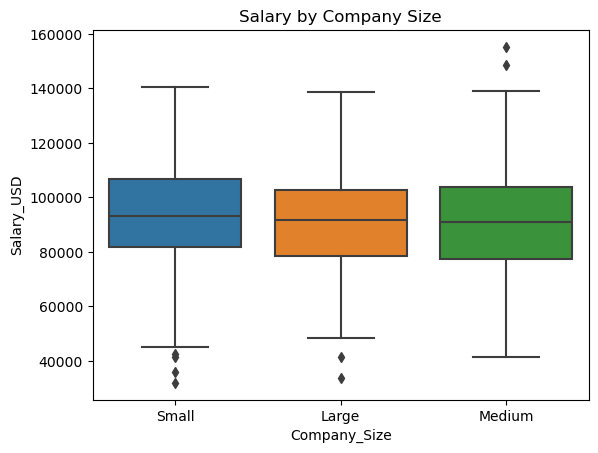

In [10]:
sns.boxplot(x='Company_Size',y='Salary_USD',data=data)
plt.title('Salary by Company Size')
plt.show()

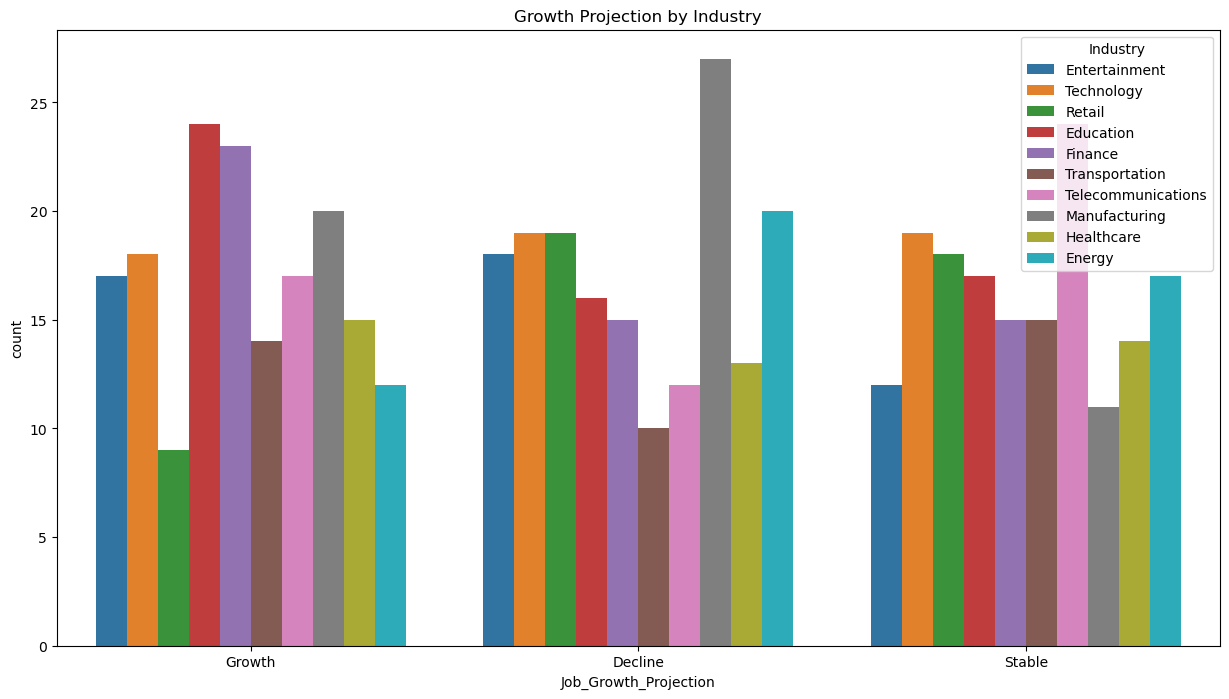

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(x='Job_Growth_Projection',hue='Industry',data=data)
plt.title('Growth Projection by Industry')
plt.show()

Text(0.5, 1.0, 'Automation Risk by Job Location')

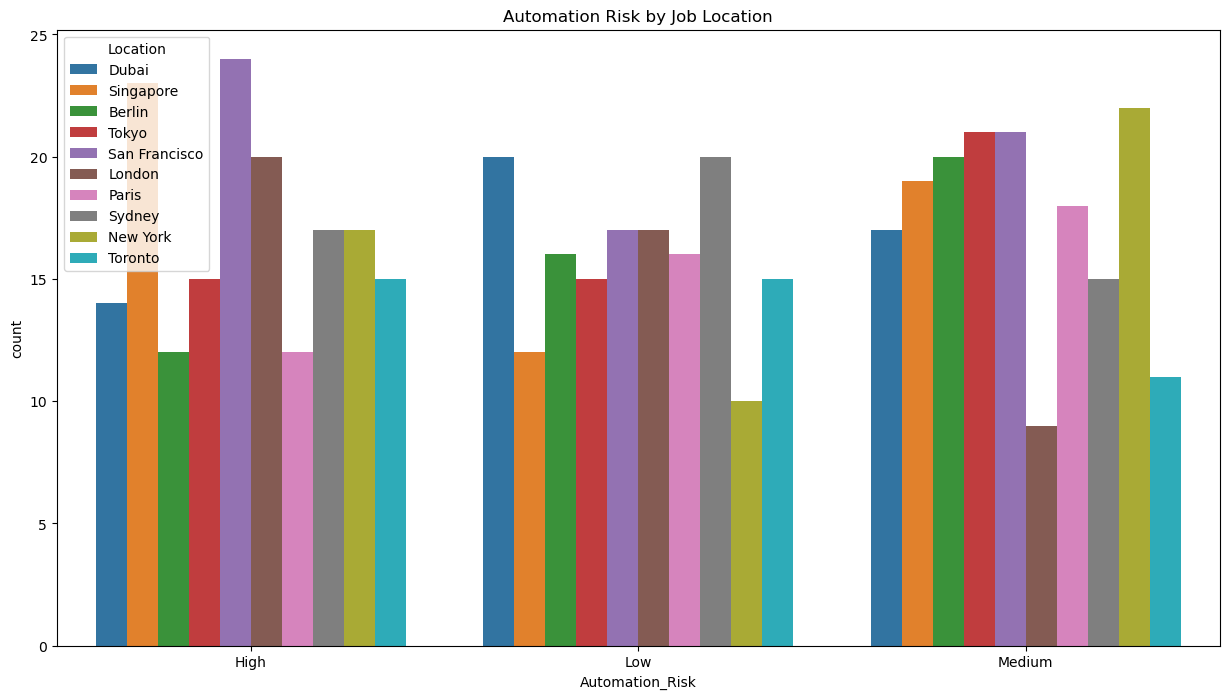

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(x='Automation_Risk',hue='Location',data=data)
plt.title('Automation Risk by Job Location')

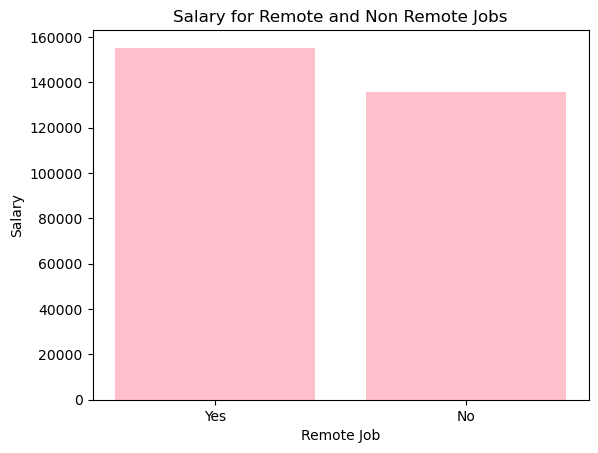

In [65]:
plt.bar(data['Remote_Friendly'],data['Salary_USD'],color='pink')
plt.title("Salary for Remote and Non Remote Jobs")
plt.ylabel('Salary')
plt.xlabel('Remote Job')
plt.show()

In [18]:
skill=data['Required_Skills'].value_counts()
skill

Required_Skills
Project Management    60
Python                60
Cybersecurity         58
Machine Learning      52
UX/UI Design          49
Sales                 49
Data Analysis         49
Marketing             45
JavaScript            44
Communication         34
Name: count, dtype: int64

In [31]:
skill.head(5)

Required_Skills
Project Management    60
Python                60
Cybersecurity         58
Machine Learning      52
UX/UI Design          49
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

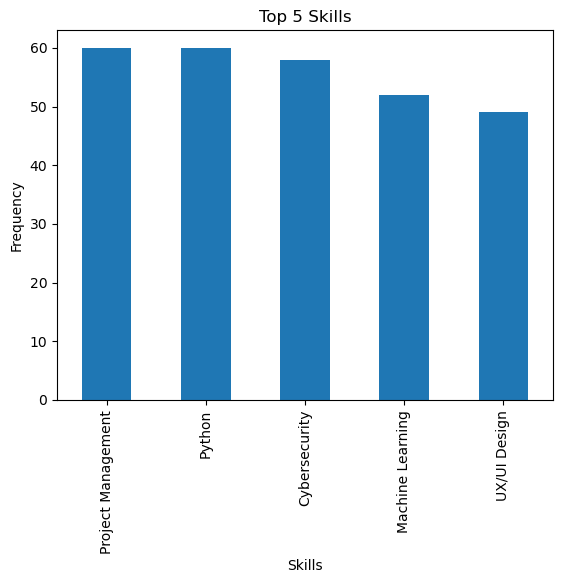

In [35]:
skill.head(5).plot(kind='bar')
plt.title('Top 5 Skills')
plt.xlabel('Skills')
plt.ylabel('Frequency')

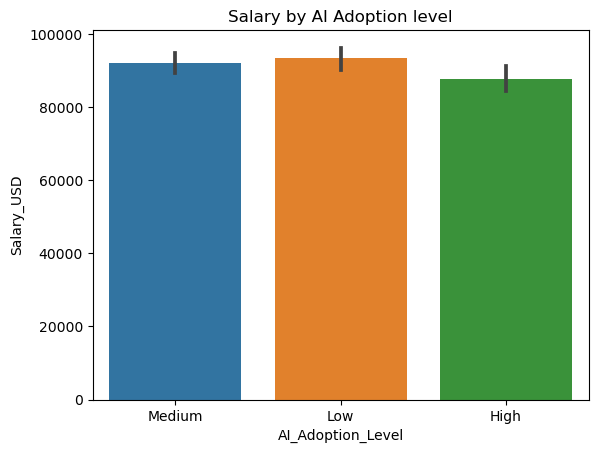

In [37]:
sns.barplot(x='AI_Adoption_Level',y='Salary_USD',data=data)
plt.title('Salary by AI Adoption level')
plt.show()

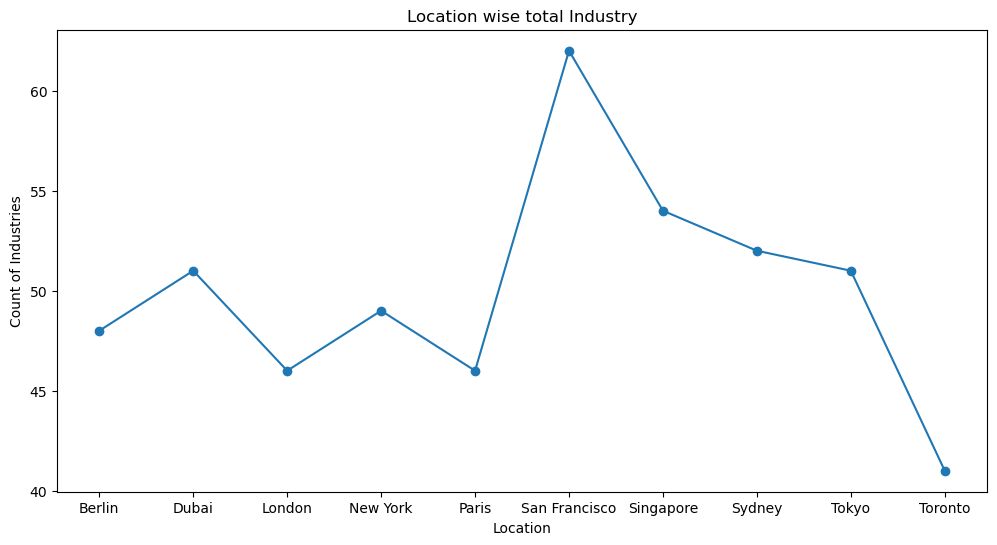

In [29]:
loc=data.groupby('Location')['Industry'].count().reset_index()
plt.figure(figsize=(12,6))
plt.plot(loc['Location'],loc['Industry'],marker='o')
plt.title('Location wise total Industry')
plt.ylabel('Count of Industries')
plt.xlabel('Location')
plt.show()

In [51]:
pd.crosstab(data['Required_Skills'],data['Remote_Friendly'])

Remote_Friendly,No,Yes
Required_Skills,,
Communication,16,18
Cybersecurity,29,29
Data Analysis,21,28
JavaScript,20,24
Machine Learning,24,28
Marketing,27,18
Project Management,33,27
Python,32,28
Sales,23,26


<Figure size 1200x600 with 0 Axes>

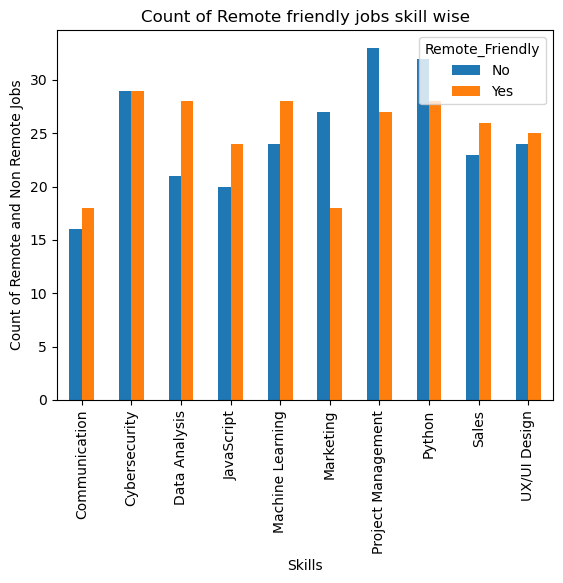

In [59]:
plt.figure(figsize=(12,6))
pd.crosstab(data['Required_Skills'],data['Remote_Friendly']).plot(kind='bar')
plt.xlabel('Skills')
plt.ylabel('Count of Remote and Non Remote Jobs')
plt.title('Count of Remote friendly jobs skill wise')


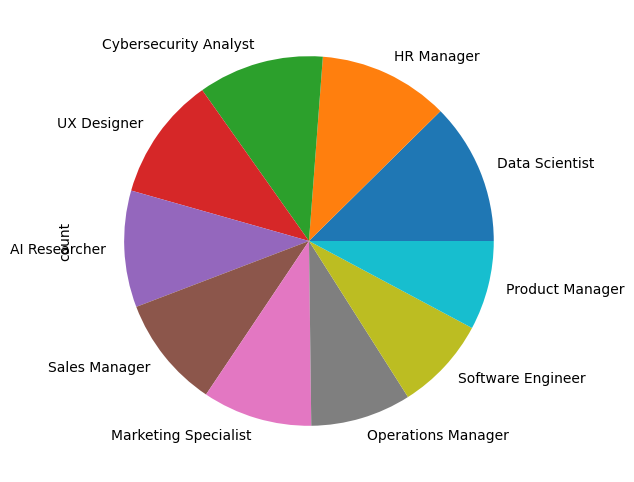

In [12]:
plt.figure(figsize=(10,6))
data.Job_Title.value_counts().plot(kind='pie')
plt.show()

# Thank You !

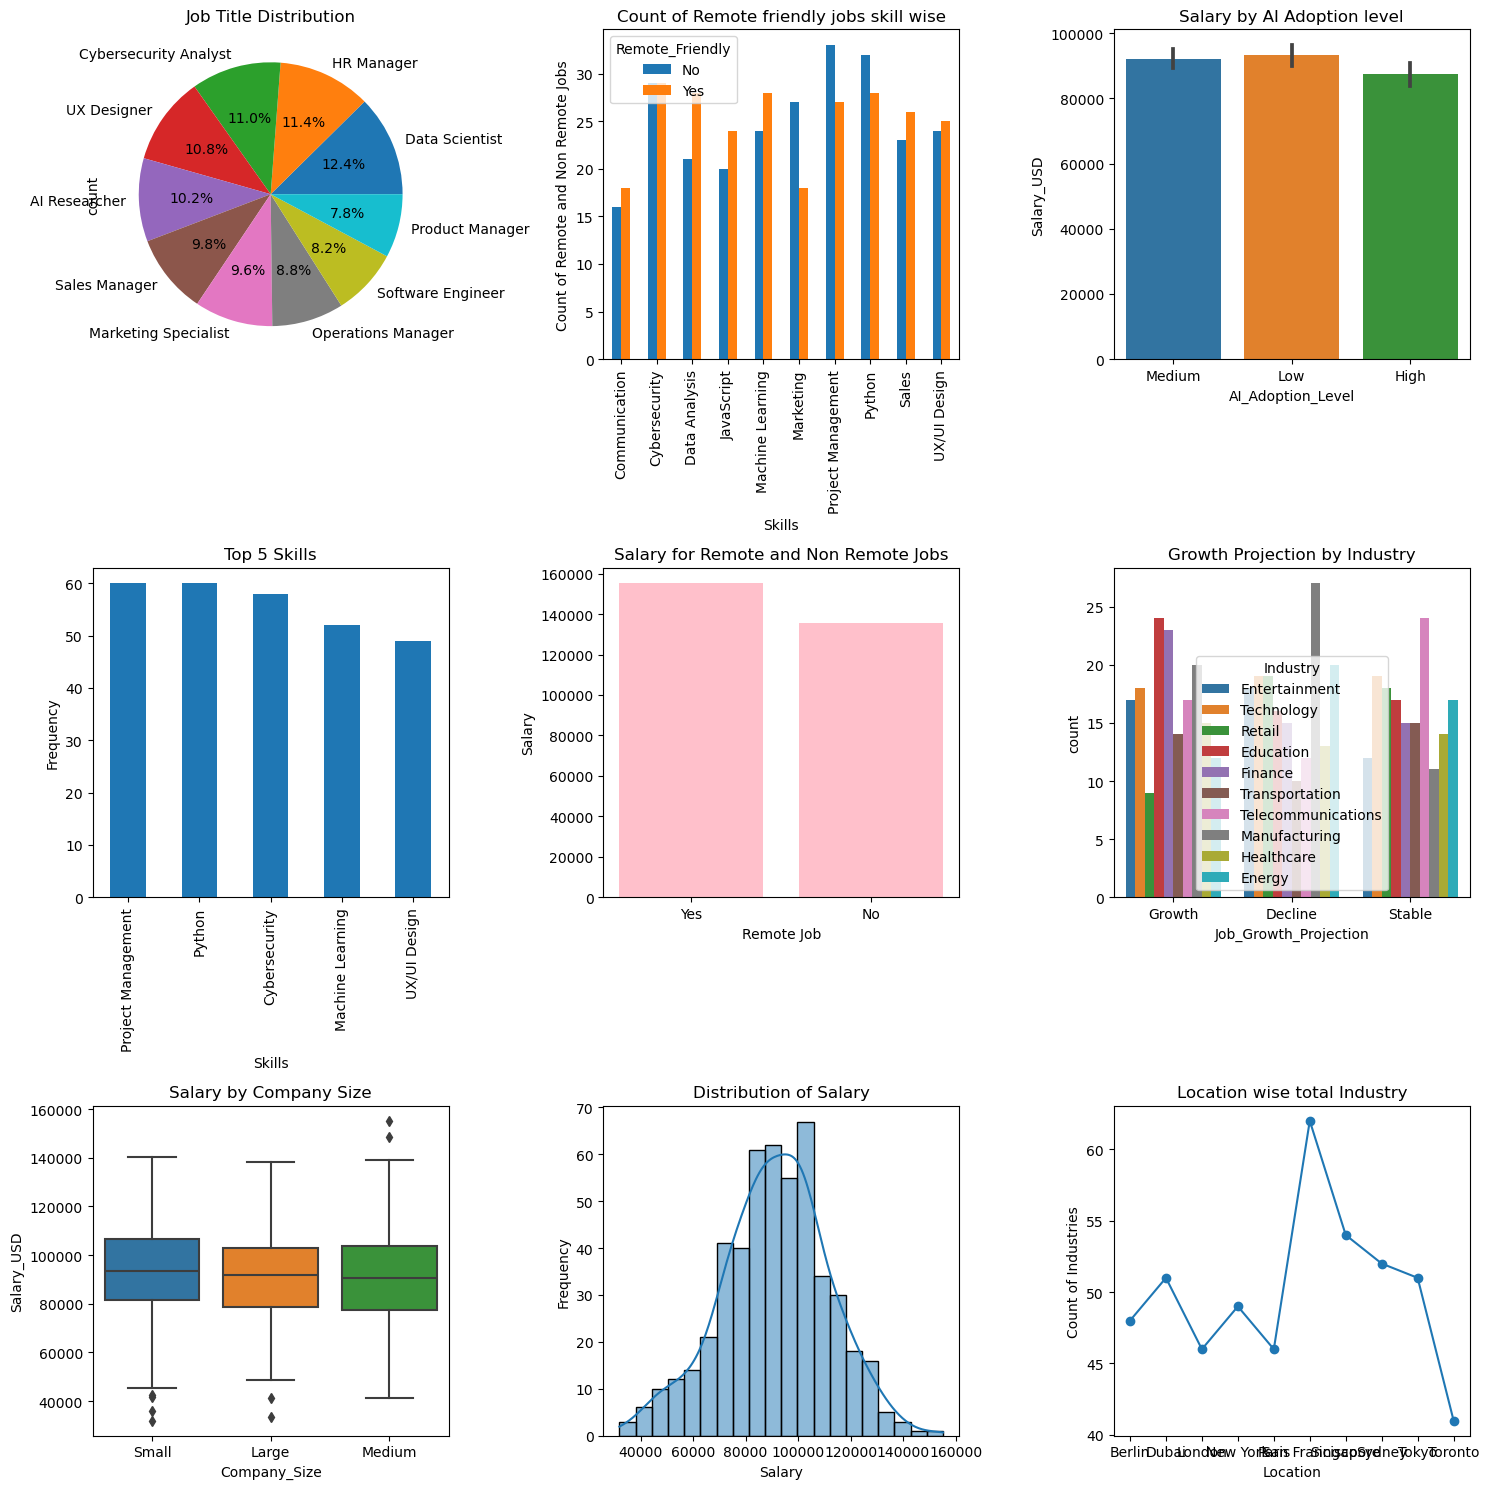

In [37]:
fig, axs=plt.subplots(3,3,figsize=(15,15))
data.Job_Title.value_counts().plot(kind='pie',ax=axs[0,0],autopct='%1.1f%%')
axs[0, 0].set_title('Job Title Distribution')

pd.crosstab(data['Required_Skills'],data['Remote_Friendly']).plot(kind='bar',ax=axs[0,1])
axs[0,1].set_xlabel('Skills')
axs[0,1].set_ylabel('Count of Remote and Non Remote Jobs')
axs[0,1].set_title('Count of Remote friendly jobs skill wise')

sns.barplot(x='AI_Adoption_Level',y='Salary_USD',data=data,ax=axs[0,2])
axs[0,2].set_title('Salary by AI Adoption level')


skill.head(5).plot(kind='bar',ax=axs[1,0])
axs[1,0].set_title('Top 5 Skills')
axs[1,0].set_xlabel('Skills')
axs[1,0].set_ylabel('Frequency')

axs[1,1].bar(data['Remote_Friendly'],data['Salary_USD'],color='pink')
axs[1,1].set_title("Salary for Remote and Non Remote Jobs")
axs[1,1].set_ylabel('Salary')
axs[1,1].set_xlabel('Remote Job')



sns.countplot(x='Job_Growth_Projection',hue='Industry',data=data,ax=axs[1,2])
axs[1,2].set_title('Growth Projection by Industry')

sns.boxplot(x='Company_Size',y='Salary_USD',data=data,ax=axs[2,0])
axs[2,0].set_title('Salary by Company Size')


sns.histplot(data['Salary_USD'],kde=True,ax=axs[2,1])
axs[2,1].set_title('Distribution of Salary')
axs[2,1].set_xlabel('Salary')
axs[2,1].set_ylabel('Frequency')

axs[2,2].plot(loc['Location'],loc['Industry'],marker='o')
axs[2,2].set_title('Location wise total Industry')
axs[2,2].set_ylabel('Count of Industries')
axs[2,2].set_xlabel('Location')

plt.tight_layout()
plt.show()